In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


In [2]:
pip install openpyxl


     |████████████████████████████████| 242 kB 283 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing files into pandas dataframes

athletes_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx')
coaches_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx')
gender_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx')
medals_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx')
teams_df = pd.read_excel('/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx')


/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
athletes_df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [5]:
coaches_df.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [6]:
gender_df.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [7]:
medals_df.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [8]:
teams_df.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [9]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


In [10]:
athletes_df.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [11]:
gender_df.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [12]:
medals_df.shape

(93, 7)

In [13]:
medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [14]:
 athletes_df.groupby('NOC').Discipline.count()


NOC
Afghanistan                 5
Albania                     8
Algeria                    41
American Samoa              5
Andorra                     2
                           ..
Virgin Islands, British     3
Virgin Islands, US          4
Yemen                       3
Zambia                     29
Zimbabwe                    5
Name: Discipline, Length: 206, dtype: int64

In [15]:
gender_ratio = gender_df.Female/gender_df.Male

print(gender_ratio)

0     1.000000
1     1.000000
2     1.000000
3          inf
4     0.903918
5     0.988506
6     0.625000
7     1.000000
8     1.000000
9     0.545455
10    1.000000
11    0.976190
12    1.111111
13    1.000000
14    1.000000
15    0.534351
16    0.909091
17    1.014085
18    0.584000
19    0.990741
20    0.767442
21    1.000000
22    1.000000
23    1.000000
24    0.955224
25    0.952381
26    1.000000
27    1.000000
28         inf
29    0.969811
30    0.966887
31    1.000000
32    1.000000
33    1.000000
34    1.000000
35    1.000000
36    0.863636
37    1.000000
38    1.000000
39    0.969072
40    1.000000
41    1.000000
42    1.000000
43    0.835616
44    0.989899
45    0.497409
dtype: float64


In [16]:
arr = np.array(gender_ratio)

filtered_array = arr >= 1

newarr = arr[filtered_array]

print(newarr)

[1.         1.         1.                inf 1.         1.
 1.         1.11111111 1.         1.         1.01408451 1.
 1.         1.         1.         1.                inf 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [17]:
medals_df.rename(columns={'Team/NOC':'NOC'}, inplace=True)


In [18]:
medals_df.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [19]:
gold = (medals_df.Gold/medals_df.Total)*100

gold.head()

0    34.513274
1    43.181818
2    46.551724
3    33.846154
4    28.169014
dtype: float64

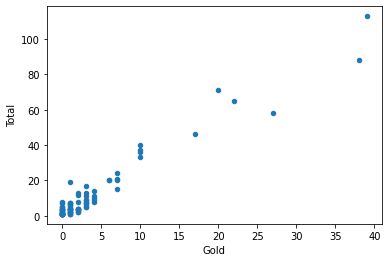

In [20]:
import matplotlib.pyplot as plt

medals_df.plot(kind='scatter', x='Gold', y='Total')
plt.show()

In [21]:
medals_df.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


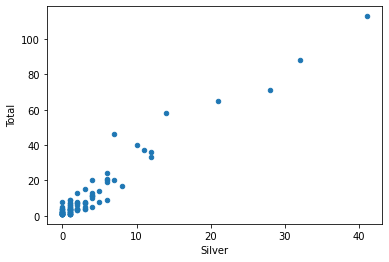

In [22]:
medals_df.plot(kind="scatter", x="Silver",y="Total")
plt.show()

<AxesSubplot:ylabel='Frequency'>

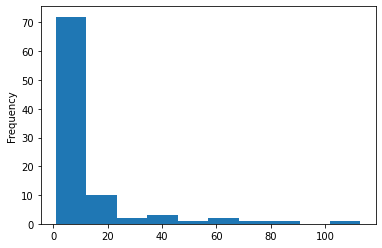

In [23]:
medals_df.Total.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

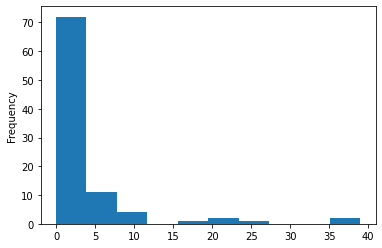

In [24]:
medals_df.Gold.plot(kind="hist")

In [25]:
coaches_df.isnull().sum()

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

In [26]:
coaches_df.shape

(394, 4)

In [27]:
coaches_df.tail()

,Name,NOC,Discipline,Event
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN
393,ZONDI Nkuliso,South Africa,Hockey,Women


In [28]:
coaches_df.dropna(inplace=True)

In [29]:
coaches_df.reset_index(inplace=True)

In [30]:
coaches_df.head()

,index,Name,NOC,Discipline,Event
0,5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men
1,6,AL SAADI Kais,Germany,Hockey,Men
2,7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball
3,8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men
4,9,ALEKSEEV Alexey,ROC,Handball,Women


In [31]:
x = teams_df.groupby('Discipline').NOC.count()

<function matplotlib.pyplot.show(close=None, block=None)>

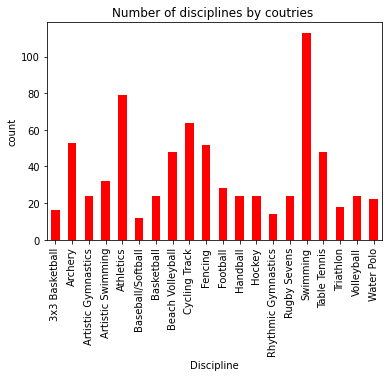

In [32]:
x = teams_df.groupby('Discipline').NOC.count()
x.plot(kind='bar', color='red',title="Number of disciplines by coutries ",ylabel="count")
plt.show

In [33]:
w = gender_df.groupby('Discipline').Female.sum()
neww=w.sort_values(ascending=False).head()

<function matplotlib.pyplot.show(close=None, block=None)>

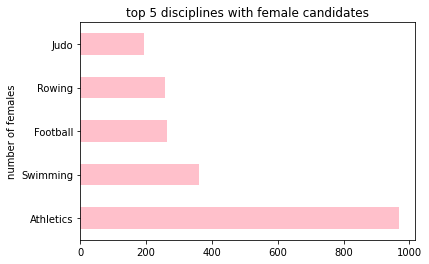

In [34]:
neww=w.sort_values(ascending=False).head()
neww.plot(kind='barh', color='pink' , title='top 5 disciplines with female candidates', xlabel='number of females', ylabel='Discipline')
plt.show


In [35]:
coachecount = coaches_df.groupby('NOC').Name.count()

q = coachecount.sort_values(ascending=False).head()

<function matplotlib.pyplot.show(close=None, block=None)>

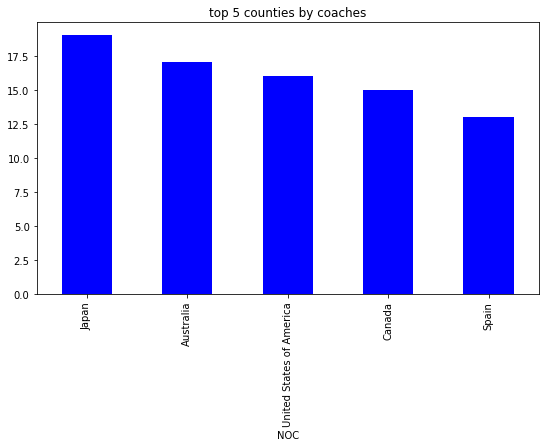

In [36]:
#top countries with number of coaches

q = coachecount.sort_values(ascending=False).head()
q.plot(kind='bar', color='blue', title='top 5 counties by coaches',figsize=(9,5))
plt.show

In [37]:
newt=teams_df.groupby('NOC').Discipline.count().sort_values(ascending=False).head()

<function matplotlib.pyplot.show(close=None, block=None)>

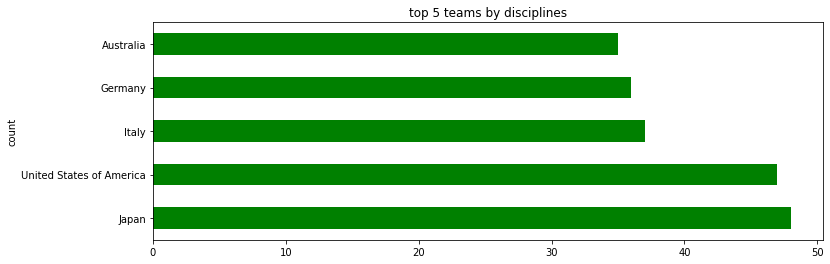

In [38]:
newt=teams_df.groupby('NOC').Discipline.count().sort_values(ascending=False).head()
newt.plot(kind='barh', color='green', title='top 5 teams by disciplines',xlabel='count',ylabel='countries',figsize=(12,4))
plt.show


In [39]:
females =gender_df.Female.sum()
males = gender_df.Male.sum()
print(females)
print(males)


5432
5884


         genderparticipation
females                 5432
males                   5884


<function matplotlib.pyplot.show(close=None, block=None)>

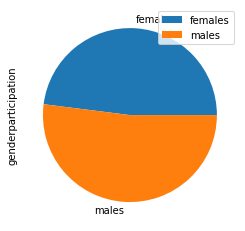

In [40]:
piegender=pd.DataFrame({'genderparticipation':[5432,5884]},index=['females','males'])
print(piegender)
piegender.plot(kind='pie',x=females, subplots=True)
plt.show

# Top five countries with most number of athletes in 2021 olympics

<function matplotlib.pyplot.show(close=None, block=None)>

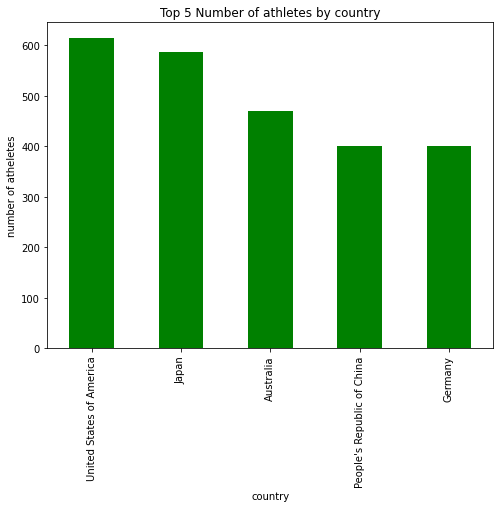

In [41]:
numathe= athletes_df.groupby('NOC').Name.count().sort_values(ascending=False).head()
numathe.plot(kind='bar', title="Top 5 Number of athletes by country", figsize=(8,6), xlabel="country",
            ylabel="number of atheletes", color="green")
plt.show


In [42]:
medals_df.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [43]:
medals_df.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [44]:
total_gold= medals_df.Gold.sum()
percentgold=medals_df.Gold.map(lambda g: (g/total_gold)*100).head()
print(percentgold)

0    11.470588
1    11.176471
2     7.941176
3     6.470588
4     5.882353
Name: Gold, dtype: float64


In [45]:
total_silver= medals_df.Silver.sum()
percentsilver=medals_df.Silver.map(lambda s: (s/total_silver)*100).head()

print(percentsilver)

0    12.130178
1     9.467456
2     4.142012
3     6.213018
4     8.284024
Name: Silver, dtype: float64


In [46]:
total_bronze= medals_df.Bronze.sum()
percentbronze=medals_df.Bronze.map(lambda s: (s/total_bronze)*100).head()
print(percentbronze)

0    8.208955
1    4.477612
2    4.228856
3    5.472637
4    5.721393
Name: Bronze, dtype: float64


# Rankings of countries and skewness of medal counts from top to bottom

<function matplotlib.pyplot.show(close=None, block=None)>

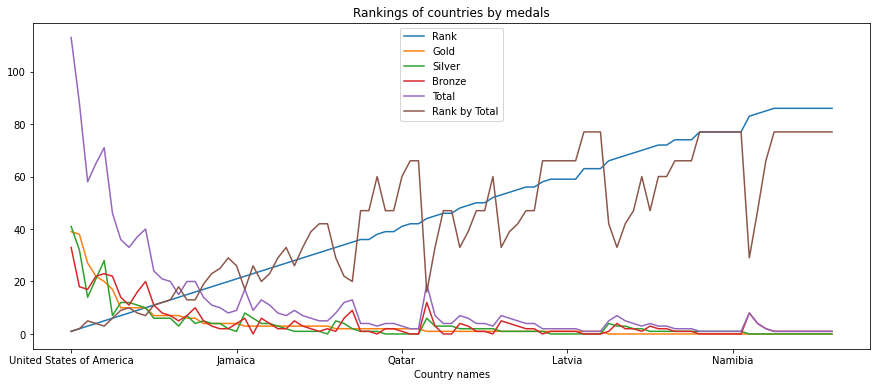

In [47]:
medals_df.plot(kind="line",x="NOC", figsize=(15,6),title="Rankings of countries by medals", xlabel="Country names")
plt.show

# Percentage of medals earned by top countries 

                                 gold     silver    bronze
NOC                                                       
United States of America    11.470588  12.130178  8.208955
People's Republic of China  11.176471   9.467456  4.477612
Japan                        7.941176   4.142012  4.228856
Great Britain                6.470588   6.213018  5.472637
ROC                          5.882353   8.284024  5.721393


<AxesSubplot:title={'center':'Top5 countries with highest medals'}, xlabel='NOC', ylabel='%of medals out of total'>

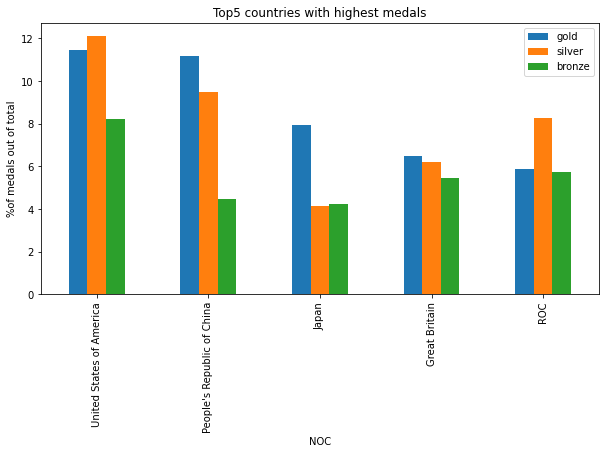

In [48]:
topcountry=medals_df.NOC.head()
percentgold=np.array([medals_df.Gold.map(lambda g: (g/total_gold)*100).head()])
arrg= percentgold.reshape(-1)
percentsilver=np.array([medals_df.Silver.map(lambda s: (s/total_silver)*100).head()])
arrs= percentsilver.reshape(-1)
percentbronze=np.array([medals_df.Bronze.map(lambda s: (s/total_bronze)*100).head()])
arrb= percentbronze.reshape(-1)

df=pd.DataFrame({'gold':arrg,'silver':arrs,'bronze':arrb}, index=topcountry)
print(df)

df.plot.bar(ylabel="%of medals out of total", title="Top5 countries with highest medals",
                     figsize =(10,5))

# Here's top countries earned medals above mean level of medals earned per country

<function matplotlib.pyplot.show(close=None, block=None)>

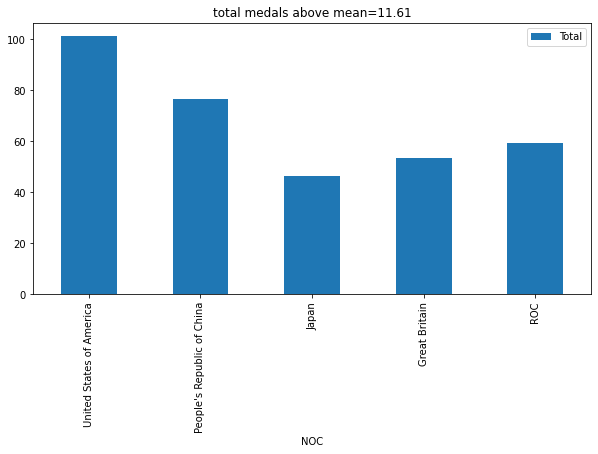

In [49]:
def totalmedalpercent(row):
    row.Total = row.Total - medals_df.Total.mean()
    return row

df=medals_df.apply(totalmedalpercent, axis="columns").head()

df.plot(kind="bar", x="NOC", y="Total", title="total medals above mean=11.61", figsize=(10,5))

plt.show

# Countries with lowest number of of athletes participated in olympics

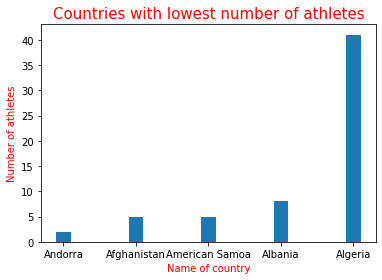

In [50]:
ath= athletes_df.groupby('NOC').Name.count().head().sort_values(ascending=True).head()
atharr= np.array(ath)
xpoints=np.array(ath.index)

plt.bar(xpoints, atharr, width=0.2)
plt.title("Countries with lowest number of athletes", fontdict={'size':15,'color':"red"})
plt.xlabel("Name of country",fontdict={'size':10,'color':"red"})
plt.ylabel("Number of athletes",fontdict={'size':10,'color':"red"})
plt.show()


# Countries participated in events grouped by country and discipline

In [51]:
teams_df.groupby(['NOC','Discipline']).count().head(20).rename(columns={'Name':'Team'})

Team  Event
NOC       Discipline                      
Angola    Handball                1      1
Argentina Basketball              1      1
          Beach Volleyball        2      2
          Football                1      1
          Handball                1      1
          Hockey                  2      2
          Rugby Sevens            1      1
          Volleyball              2      2
Australia Archery                 2      2
          Artistic Swimming       2      2
          Athletics               1      1
          Baseball/Softball       1      1
          Basketball              2      2
          Beach Volleyball        2      2
          Cycling Track           5      5
          Football                2      2
          Hockey                  2      2
          Rhythmic Gymnastics     1      1
          Rugby Sevens            2      2
          Swimming                7      7